## Linear Regression Reading test scores





The Programme for International Student Assessment (PISA) is a test given every three years to 15-year-old students from around the world to evaluate their performance in mathematics, reading, and science. This test provides a quantitative way to compare the performance of students from different parts of the world. In this homework assignment, **we will predict the reading scores of students** from the United States of America on the 2009 PISA exam.

Reference
* MITx 15.071x - The Analytics Edge
* The course is available on edX platform

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


## `1.` Read the dataset

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
r = pd.read_csv('asset-v1_MITx+15.071x+2T2017+type@asset+block@pisa2009train.csv')
r_test = pd.read_csv('asset-v1_MITx+15.071x+2T2017+type@asset+block@pisa2009test.csv')

In [3]:
r.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [4]:
r_test.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,355.24
1,10,1,White,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,255.0,NaN,1.0,1,0,808.0,385.57
2,10,0,White,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,NaN,30.0,1.0,1,0,808.0,522.62
3,10,0,White,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,160.0,30.0,NaN,1,0,808.0,406.24
4,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,240.0,30.0,1.0,1,0,808.0,453.50


b. Use the cell below to find the number of rows in the dataset.

In [5]:
# get the total number of rows in the dataframe
n_rows = r.shape[0]
print('number of rows is :', n_rows)

number of rows is : 3663


c. The number of unique entries 

In [6]:
# get the number of unique entries in the grade column
r.grade.unique().tolist()

[11, 9, 10, 12, 8]

d. Describe the dataset

In [7]:
# include all the columns (categorical and numerical)
r.describe(include = 'all')

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3628,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,...,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
unique,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.089817,0.511057,NaN,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,...,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,NaN,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,...,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000


e. get information on the dataset and dtypes

In [8]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

The majority of columns are neumerical values and the datas set has empty entries. The missingno package will be used to visualize the distibution of the empty data in the dataset .

In [9]:
!pip install missingno

You should consider upgrading via the 'c:\users\mustafa adel\anaconda3\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:>

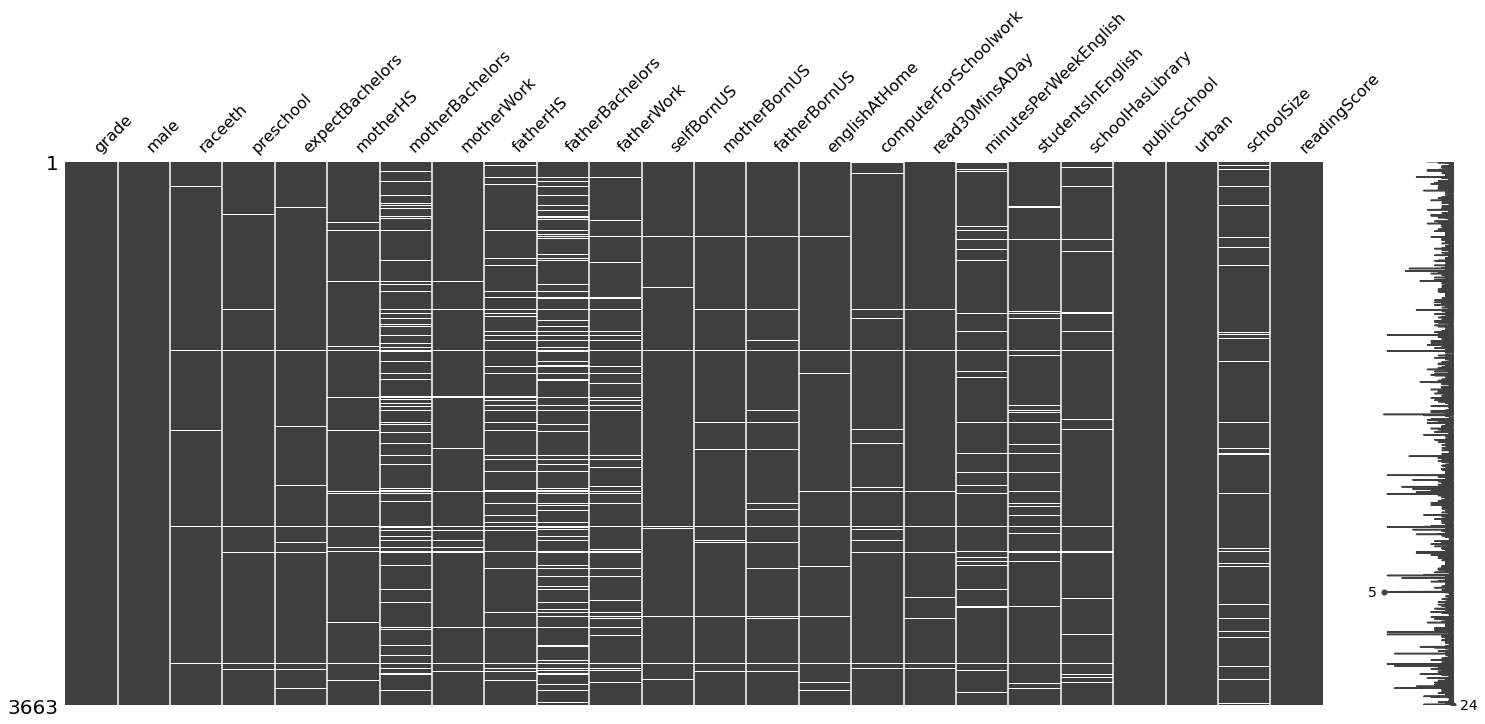

In [10]:
import missingno as msno
msno.matrix(r)

In [11]:
#Sum the number of missing data in the dataset 
r.isnull().sum().sort_values()

grade                      0
urban                      0
publicSchool               0
readingScore               0
male                       0
read30MinsADay            34
raceeth                   35
preschool                 56
expectBachelors           62
computerForSchoolwork     65
selfBornUS                69
motherBornUS              71
englishAtHome             71
motherWork                93
motherHS                  97
fatherBornUS             113
schoolHasLibrary         143
schoolSize               162
minutesPerWeekEnglish    186
fatherWork               233
fatherHS                 245
studentsInEnglish        249
motherBachelors          397
fatherBachelors          569
dtype: int64

f. remove the missing data from the training and testing data 

In [12]:
# the clean dataset is as below
rc = r.dropna(axis=0, inplace=False)
print(rc.isnull().sum())
print(rc.shape[0])

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64
2414


<AxesSubplot:>

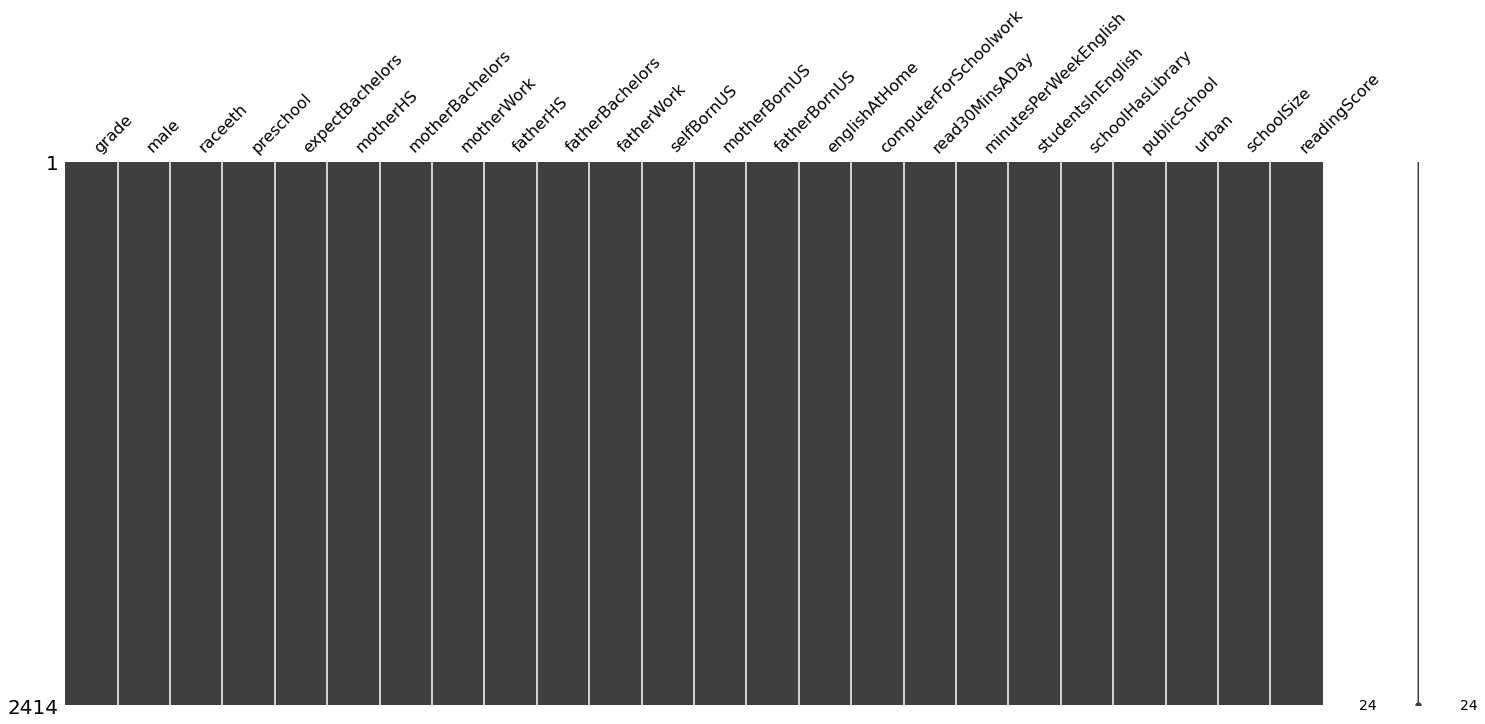

In [13]:
msno.matrix(rc)

In [14]:
# clean the r_test dataset 
r_testc = r_test.dropna(axis=0, inplace=False)
r_testc.isnull().sum()
print(r_testc.shape[0])

990


It is required to calculate the difference in grades between males and females

In [15]:
## calculate the mean grade for male students
r_m = r[r['male']==1]
print('Male students average readingScore is :',r_m['readingScore'].mean())

## calcualre the mean grade for female students 
r_f = r[r['male']==0]
print('Female students average readingScore is :',r_f['readingScore'].mean())


Male students average readingScore is : 483.53247863247805
Female students average readingScore is : 512.94063093244


Factor variables are variables that take on a discrete set of values, like the "Region" variable in the WHO dataset from the second lecture of Unit 1. This is an unordered factor because there isn't any natural ordering between the levels. An ordered factor has a natural ordering between the levels (an example would be the classifications "large," "medium," and "small").

To include unordered factors in a linear regression model, we define one level as the "reference level" and add a binary variable for each of the remaining levels. In this way, a factor with n levels is replaced by n-1 binary variables. **The reference level is typically selected to be the most frequently occurring level in the dataset.**

As an example, consider the unordered factor variable "color", with levels "red", "green", and "blue". If "green" were the reference level, then we would add binary variables "colorred" and "colorblue" to a linear regression problem. All red examples would have colorred=1 and colorblue=0. All blue examples would have colorred=0 and colorblue=1. All green examples would have colorred=0 and colorblue=0.

Now, consider the variable "raceeth" in our problem, which has levels "American Indian/Alaska Native", "Asian", "Black", "Hispanic", "More than one race", "Native Hawaiian/Other Pacific Islander", and "White". Because it is the most common in our population, we will select White as the reference level.

## `2.` Prepare the dataset for the model 

In [16]:
# make dummy variables of the unordered data like race 
dummies_rc = pd.get_dummies(rc['raceeth'])
dummies_r_testc = pd.get_dummies(r_testc['raceeth'])
dummies_rc.head()

,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1
9,0,0,0,0,1,0,0


In [17]:
# merg the dummies with the dataframes
rc_dum = pd.concat([rc,dummies_rc], axis = 1)
r_testc_dum = pd.concat([r_testc,dummies_r_testc], axis = 1)

## `3.` Correaltion

In [18]:
rc_dum.columns

Index(['grade', 'male', 'raceeth', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize', 'readingScore',
       'American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander',
       'White'],
      dtype='object')

In [19]:
## calculate the correlation coeffecients and create a dataframe to store results 
col_names = ('col', 'corr')
corr_df = pd.DataFrame(columns = col_names)

for i in ['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander',
       'White']:
    correlation = rc_dum[['readingScore', i]].corr()[i][0]
    corr_df = corr_df.append({'col': i ,'corr': correlation}, ignore_index = True)
corr_df.head()

,col,corr
0,grade,0.238684
1,male,-0.128458
2,preschool,0.051289
3,expectBachelors,0.344304
4,motherHS,0.138983


In [20]:
# get the columns and that has the maximum correlation 
corr_df.loc[corr_df['corr']==corr_df['corr'].max()]

,col,corr
3,expectBachelors,0.344304


In [21]:
## collect some columns and calculate the maximum correlation coefficeint 
"""

The question can be answered differently using a dictionary as below

"""

##********* Very Important *************##

corr_dic = {}
for i in ['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander',
       'White']:
    correlation = rc_dum[['readingScore', i]].corr()[i][0]
    corr_dic[i]=correlation

max_correlation = max(corr_dic, key=corr_dic.get) 
print(max_correlation,corr_dic[max_correlation])

expectBachelors 0.34430376001626156


**Pairplots**

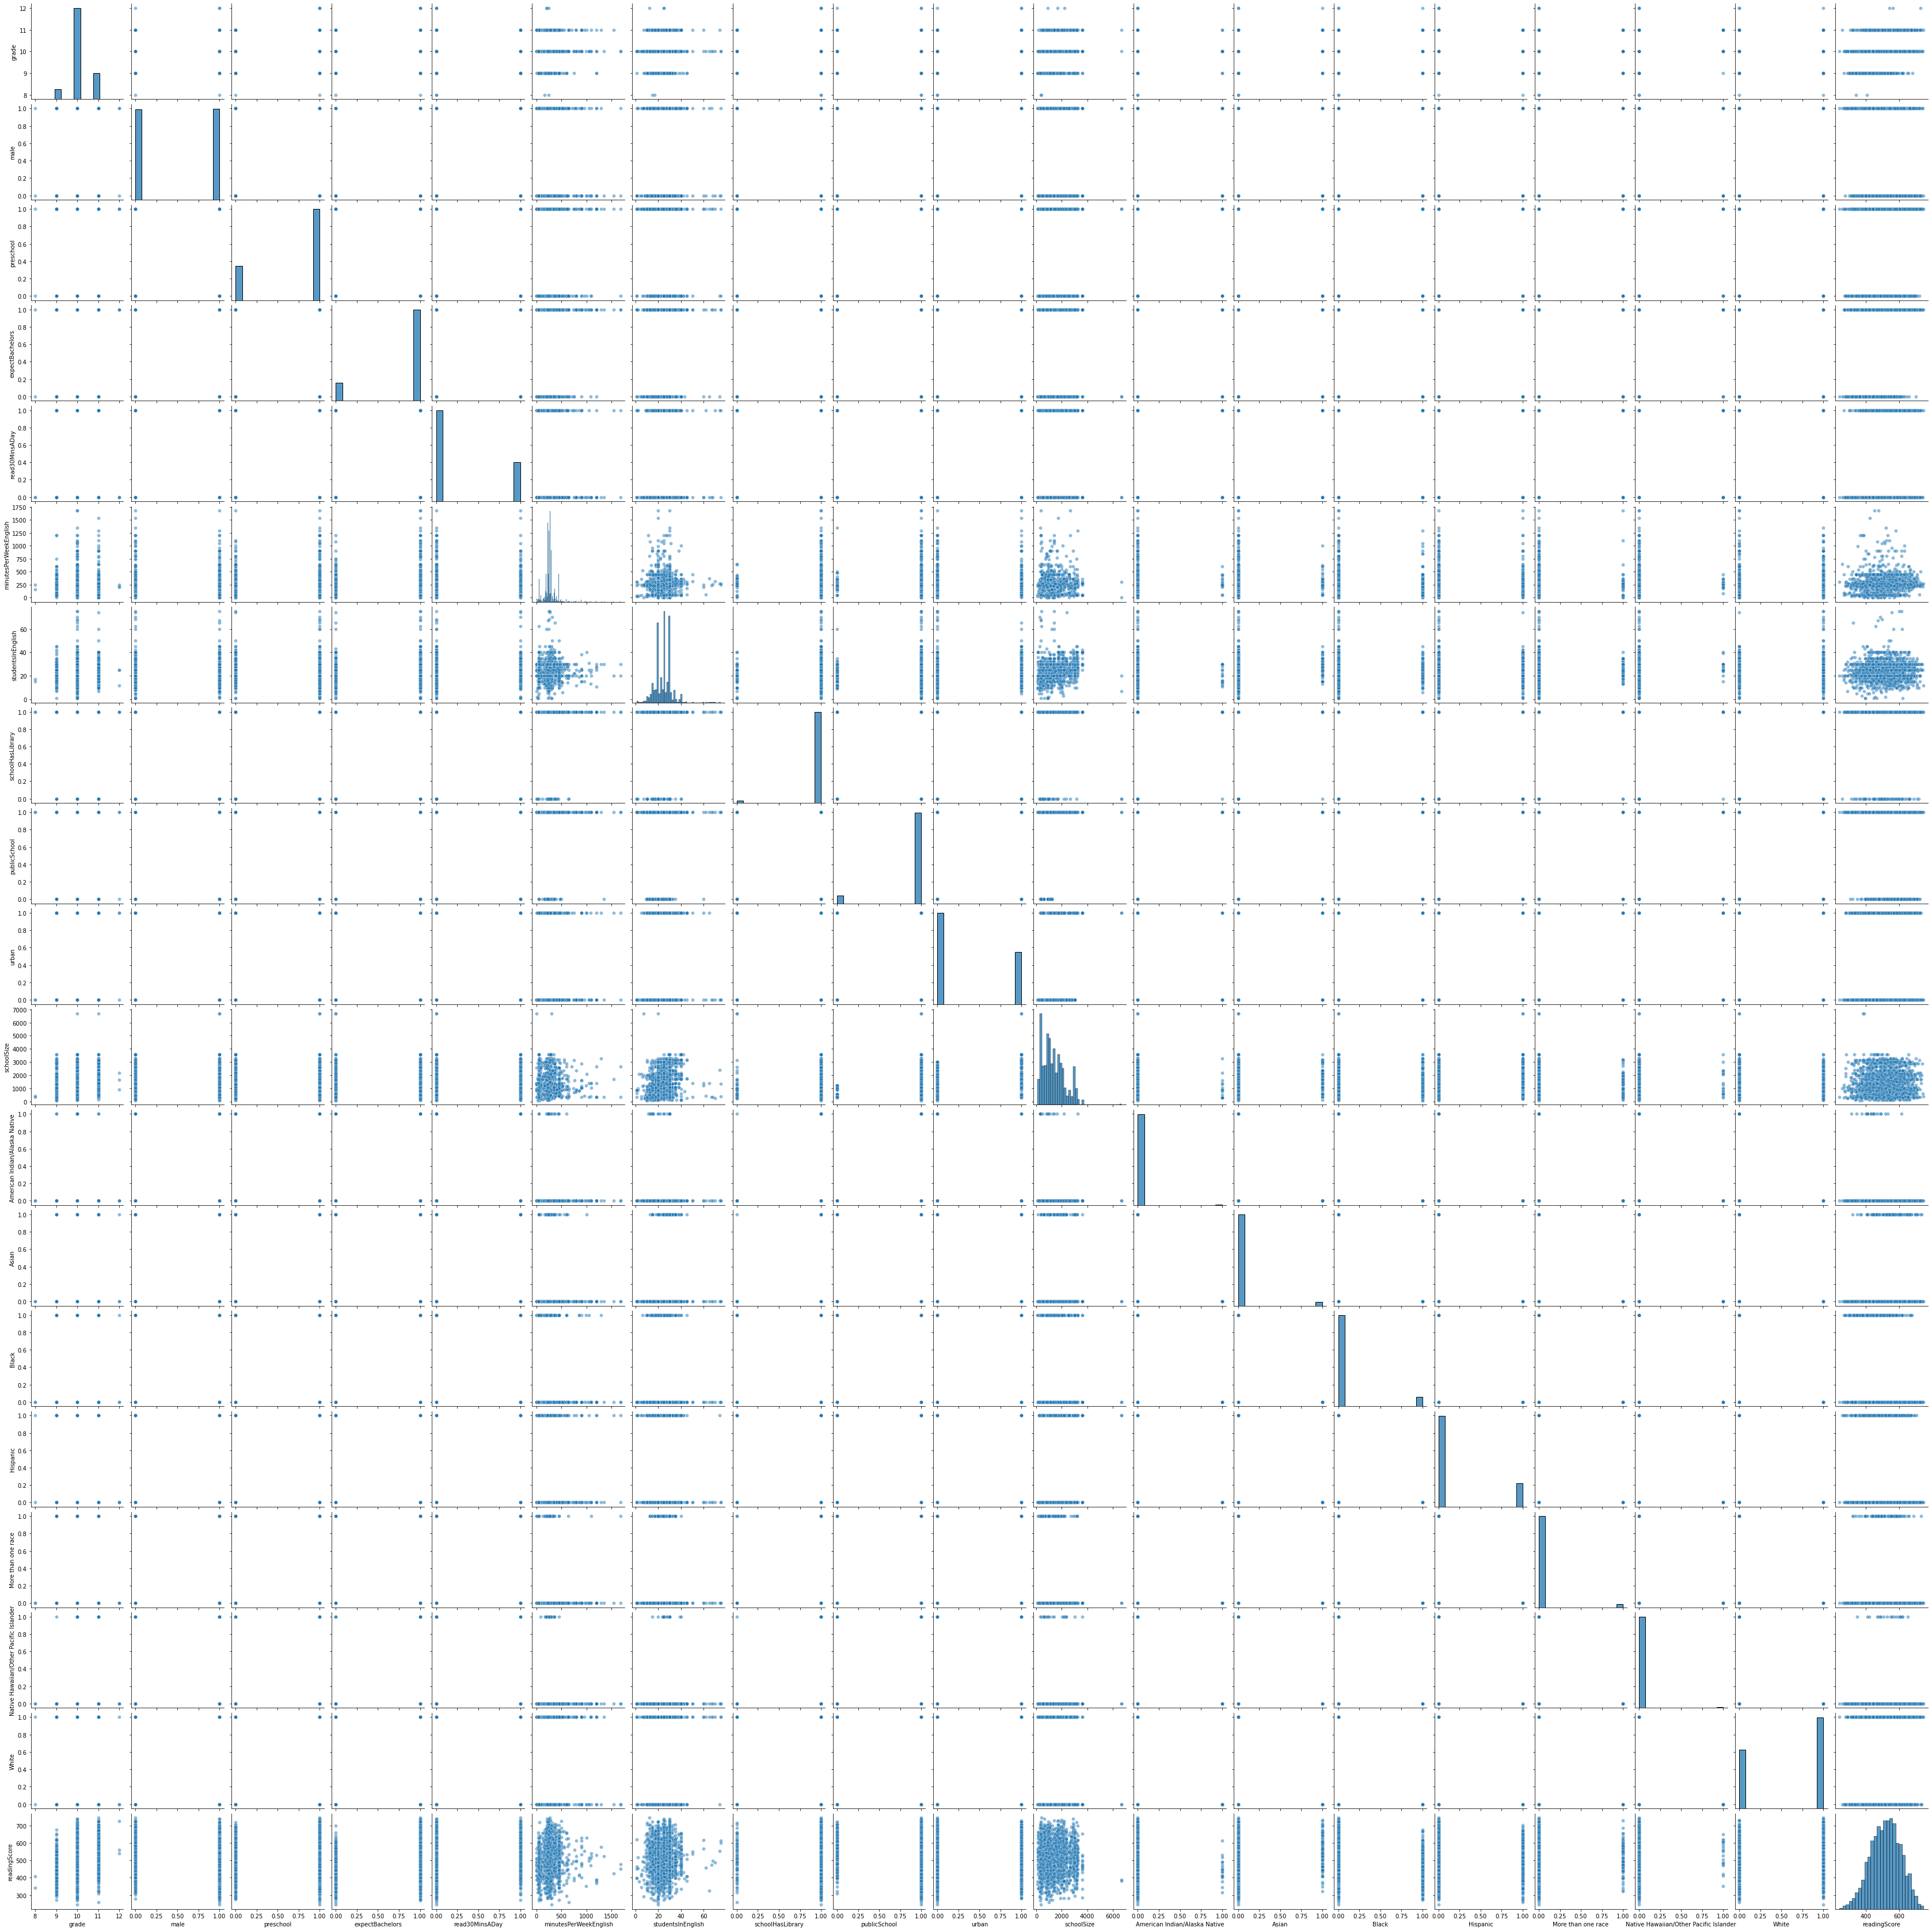

In [22]:
## construct pairplots 
import seaborn as sns

rc_dum_col = ['grade', 'male', 'preschool', 'expectBachelors', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander',
       'White', 'readingScore']
g = sns.pairplot(rc_dum[rc_dum_col], plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

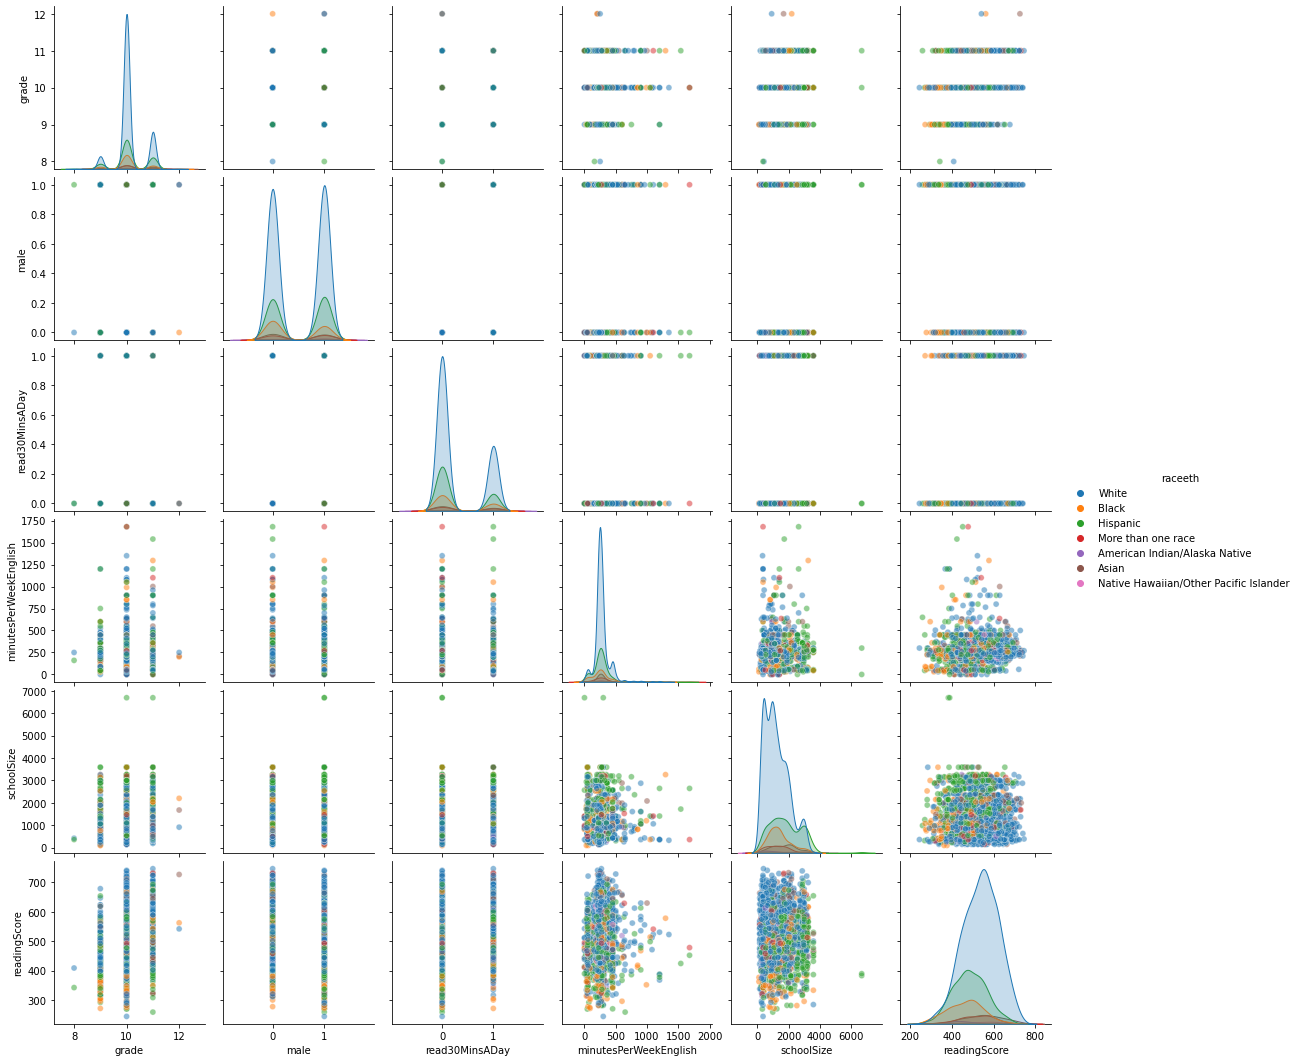

In [23]:
"""
seeing the data with respect to the race categories, thiw will require relying on 
the dataset before creating the dummy variables (rc) 
"""
rc_dum_col = ['grade', 'male', 'raceeth', 'read30MinsADay',
       'minutesPerWeekEnglish', 
       'schoolSize', 'readingScore']
g = sns.pairplot(rc[rc_dum_col], plot_kws={'alpha': 0.5, 'edgecolor': 'white'}, hue = 'raceeth')
fig = g.fig;

**Corelation heatmap**

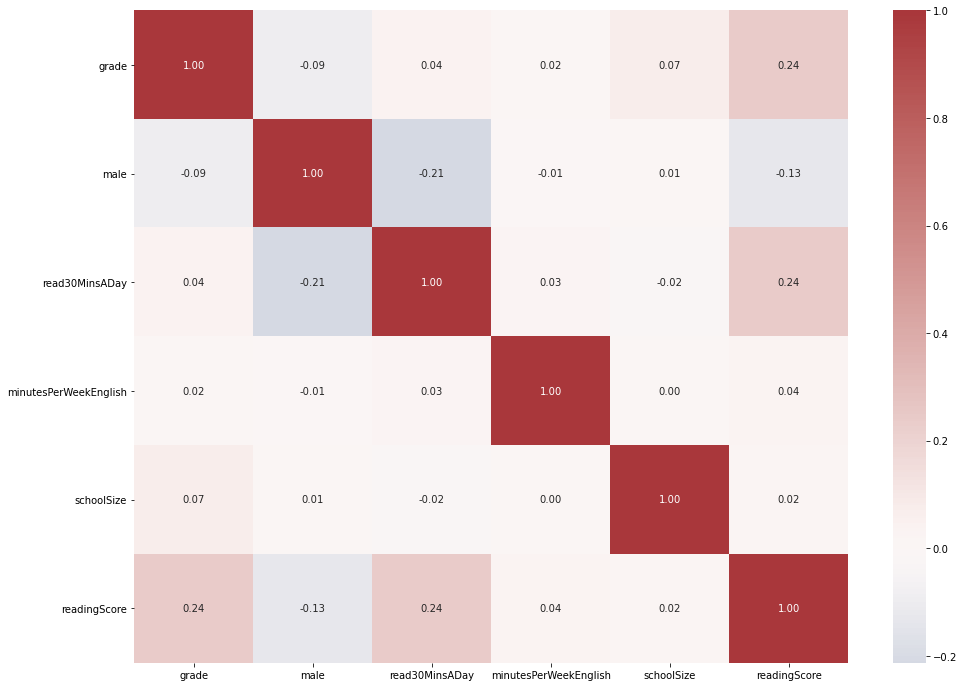

In [24]:
# correlation plot
plt.figure(figsize = [16, 12])
sns.heatmap(rc_dum[rc_dum_col].corr(), annot = True, fmt = '.2f',cmap = 'vlag', center = 0)
plt.show()

In [25]:
## the below code will get you the coorelation coefecient
rc_dum[['readingScore','expectBachelors']].corr()

,readingScore,expectBachelors
readingScore,1.000000,0.344304
expectBachelors,0.344304,1.000000


`From the correlation plots it is found that:`

1- The reading score has good correlation with grade, reading 30 mins a day, and being of white color. 

2- the correlation coefeecient is not so high, the maximum is 0.344 corresponding to expectBachelors, which is indicating that no single coeffient has a predominant effect over predicting ht reading score

`________________________________________________________________________________________________________________`


## `4.` Apply linear regression model 

2.a Linear regression model with one parameter

In [26]:
# import the statsmodels
import statsmodels.api as sm

# Define the intercept
rc_dum['intercept'] = 1
# apply linear regression model while selecting the majority of the parameters 

lm = sm.OLS(rc_dum['readingScore'],rc_dum[['grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherBachelors', 'motherWork', 'fatherHS', 'fatherBachelors',
       'fatherWork', 'selfBornUS', 'motherBornUS', 'fatherBornUS',
       'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',
       'minutesPerWeekEnglish', 'studentsInEnglish', 'schoolHasLibrary',
       'publicSchool', 'urban', 'schoolSize',
       'American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander',
       'White', 'intercept']])
result = lm.fit()

In [27]:
# read the results summary 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           readingScore   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     41.04
Date:                Sun, 02 May 2021   Prob (F-statistic):          1.72e-180
Time:                        15:30:28   Log-Likelihood:                -13795.
No. Observations:                2414   AIC:                         2.765e+04
Df Residuals:                    2385   BIC:                         2.781e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
grade                                     29.5427      2.937     10.057      0.000      23.783      35.303
male                                     -14.5217      3.156     -4.601      0.000     -20.710      -8.333
preschool                                 -4.4637      3.486     -1.280      0.201     -11.300       2.372
expectBachelors                           55.2671      4.294     12.871      0.000      46.847      63.687
motherHS                                   6.0588      6.091      0.995      0.320      -5.886      18.004
motherBachelors                           12.6381      3.861      3.273      0.001       5.066      20.210
motherWork                                -2.8091      3.522     -0.798      0.425      -9.715       4.097
fatherHS                                   4.0182      5.579      0.720      0.471      -6.923      14.959
fatherBachelors                           16.9298      3.995      4.237      0.000       9.095      24.764
fatherWork                                 5.8428      4.396      1.329      0.184      -2.778      14.463
selfBornUS                                -3.8063      7.324     -0.520      0.603     -18.168      10.555
motherBornUS                              -8.7982      6.588     -1.336      0.182     -21.716       4.120
fatherBornUS                               4.3070      6.264      0.688      0.492      -7.976      16.590
englishAtHome                              8.0357      6.859      1.171      0.242      -5.415      21.487
computerForSchoolwork                     22.5002      5.703      3.946      0.000      11.318      33.683
read30MinsADay                            34.8719      3.408     10.231      0.000      28.188      41.556
minutesPerWeekEnglish                      0.0128      0.011      1.194      0.233      -0.008       0.034
studentsInEnglish                         -0.2866      0.228     -1.258      0.208      -0.733       0.160
schoolHasLibrary                          12.2151      9.265      1.318      0.187      -5.953      30.383
publicSchool                             -16.8575      6.726     -2.506      0.012     -30.046      -3.669
urban                                     -0.1101      3.963     -0.028      0.978      -7.881       7.661
schoolSize                                 0.0065      0.002      2.977      0.003       0.002       0.011
American Indian/Alaska Native            -24.3816     15.419     -1.581      0.114     -54.617       5.854
Asian                                     38.7854      9.081      4.271      0.000      20.977      56.593
Black                                    -24.1166      7.019     -3.436      0.001     -37.881     -10.352
Hispanic                                   3.9203      6.181      0.634      0.526     

In [28]:
# get the model R2
print('lm R2',result.rsquared)

lm R2 0.3251433559213568


In [29]:
# get the model P-values
x = result.pvalues.sort_values()
print(x)


expectBachelors                           1.059226e-36
read30MinsADay                            4.489941e-24
grade                                     2.468118e-23
White                                     1.221771e-12
male                                      4.416601e-06
Asian                                     2.022997e-05
fatherBachelors                           2.346477e-05
computerForSchoolwork                     8.188776e-05
Black                                     6.008806e-04
intercept                                 6.586026e-04
motherBachelors                           1.079791e-03
schoolSize                                2.941535e-03
More than one race                        4.312332e-03
publicSchool                              1.226078e-02
Native Hawaiian/Other Pacific Islander    1.485514e-02
American Indian/Alaska Native             1.139410e-01
motherBornUS                              1.818211e-01
fatherWork                                1.839343e-01
schoolHasL

**`The following vairables are importatnt to the model as the P-value is greater than 0.05`**:
- expectBachelors                           
- read30MinsADay                            
- grade                                     
- White                                     
- male                                      
- Asian                                    
- fatherBachelors                           
- computerForSchoolwork                     
- Black                                     
- intercept                                 
- motherBachelors                           
- schoolSize                               
- More than one race                        
- publicSchool                              
- Native Hawaiian/Other Pacific Islander    

**R-squared** will always increase if you increase the number of independednt variables in the model.
**Adjusted R-squared** will decrease if you add an independant variable that does not help the model 

2.b linear regression model with selected variables

In [30]:
lm2 = sm.OLS(rc_dum['readingScore'],rc_dum[['grade', 'male', 'expectBachelors',
       'motherBachelors', 'fatherBachelors', 'computerForSchoolwork', 'read30MinsADay',
       'publicSchool', 'schoolSize','American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander',
       'White', 'intercept']])
result2 = lm2.fit()

In [31]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           readingScore   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     75.69
Date:                Sun, 02 May 2021   Prob (F-statistic):          5.22e-189
Time:                        15:30:28   Log-Likelihood:                -13801.
No. Observations:                2414   AIC:                         2.763e+04
Df Residuals:                    2398   BIC:                         2.773e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
grade                                     29.4503      2.926     10.064      0.000      23.712      35.189
male                                     -13.9136      3.136     -4.436      0.000     -20.064      -7.763
expectBachelors                           55.6962      4.249     13.110      0.000      47.365      64.027
motherBachelors                           12.6787      3.797      3.339      0.001       5.233      20.124
fatherBachelors                           18.2466      3.928      4.646      0.000      10.545      25.949
computerForSchoolwork                     23.4554      5.600      4.189      0.000      12.475      34.436
read30MinsADay                            35.5072      3.385     10.490      0.000      28.870      42.145
publicSchool                             -15.7320      5.902     -2.666      0.008     -27.305      -4.159
schoolSize                                 0.0060      0.002      3.059      0.002       0.002       0.010
American Indian/Alaska Native            -22.8761     15.190     -1.506      0.132     -52.663       6.910
Asian                                     41.3092      8.541      4.837      0.000      24.562      58.057
Black                                    -22.3765      6.507     -3.439      0.001     -35.137      -9.616
Hispanic                                   3.9339      5.846      0.673      0.501      -7.530      15.398
More than one race                        28.6598      8.725      3.285      0.001      11.551      45.768
Native Hawaiian/Other Pacific Islander    40.7696     15.312      2.663      0.008      10.743      70.797
White                                     45.0435      5.348      8.423      0.000      34.556      55.530
intercept                                114.4634     26.984      4.242      0.000      61.549     167.377
==============================================================================
Omnibus:                        8.345   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.436
Skew:                          -0.142   Prob(JB):                       0.0147
Kurtosis:                       2.939   Cond. No.                     3.73e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.51e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**The removal of several factors did not change the accuracy of the model, only very very slightly as reflected in the R2 parameter**

The **standard error** column gives a measure
of how much the coefficient is likely to vary
from the estimate value.
The **t value** is the estimate divided by the standard error.
It will be negative if the estimate
is negative and positive if the estimate is positive.
The larger the absolute value of the t value, the more likely
the coefficient is to be significant.

**P**: We want independent variables with small values
in this column.

In [32]:
#construct third model
lm3 = sm.OLS(rc_dum['readingScore'],rc_dum[['grade', 'male', 'expectBachelors',
       'motherBachelors', 'fatherBachelors', 'computerForSchoolwork', 'read30MinsADay',
       'publicSchool', 'schoolSize', 'Asian', 'Black','White', 'intercept']])
result3 = lm3.fit()

In [33]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           readingScore   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.88
Date:                Sun, 02 May 2021   Prob (F-statistic):          1.06e-188
Time:                        15:30:28   Log-Likelihood:                -13809.
No. Observations:                2414   AIC:                         2.764e+04
Df Residuals:                    2401   BIC:                         2.772e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
grade                    29.7047      2.932     10.130      0.000      23.954      35.455
male                    -13.7754      3.142     -4.384      0.000     -19.937      -7.614
expectBachelors          55.9721      4.259     13.143      0.000      47.621      64.323
motherBachelors          13.0445      3.802      3.431      0.001       5.590      20.499
fatherBachelors          18.4578      3.935      4.690      0.000      10.741      26.175
computerForSchoolwork    24.6135      5.592      4.401      0.000      13.648      35.579
read30MinsADay           35.5937      3.390     10.500      0.000      28.946      42.241
publicSchool            -16.0406      5.899     -2.719      0.007     -27.607      -4.474
schoolSize                0.0056      0.002      2.904      0.004       0.002       0.009
Asian                    33.5429      8.229      4.076      0.000      17.406      49.680
Black                   -29.9659      5.804     -5.163      0.000     -41.347     -18.585
White                    37.1671      3.819      9.733      0.000      29.679      44.655
intercept               118.8046     30.742      3.865      0.000      58.521     179.088
==============================================================================
Omnibus:                        7.908   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.990
Skew:                          -0.136   Prob(JB):                       0.0184
Kurtosis:                       2.923   Cond. No.                     3.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
## The parameters of the model 
result3.params

grade                     29.704660
male                     -13.775419
expectBachelors           55.972088
motherBachelors           13.044534
fatherBachelors           18.457750
computerForSchoolwork     24.613475
read30MinsADay            35.593687
publicSchool             -16.040641
schoolSize                 0.005628
Asian                     33.542894
Black                    -29.965931
White                     37.167122
intercept                118.804645
dtype: float64

**Check the quality of the predicted Data**

In [35]:
predicted_y_training = result3.predict(rc_dum[['grade', 'male', 'expectBachelors',
       'motherBachelors', 'fatherBachelors', 'computerForSchoolwork', 'read30MinsADay',
       'publicSchool', 'schoolSize', 'Asian', 'Black','White', 'intercept']])

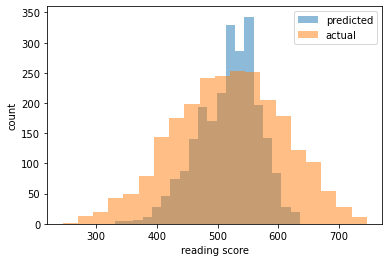

In [36]:
hamada_hist = dict(histtype='stepfilled', alpha=0.5, bins=20)
plt.hist(predicted_y_training, **hamada_hist);# the stars mean take the ling specified by what is after
plt.hist(rc_dum['readingScore'], **hamada_hist);
names = ['predicted', 'actual']
plt.xlabel('reading score')
plt.ylabel('count')
plt.legend(names) # alwys better to save the legend names in a list and add the name of the list
plt.show()


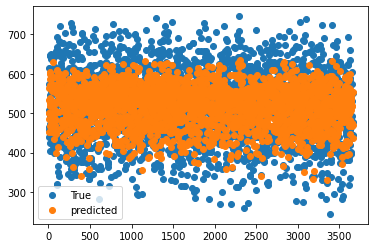

In [37]:
## check the predicted values against the actual values

fig, ax = plt.subplots()
plt.scatter(rc_dum.index, rc_dum.readingScore)
plt.scatter(rc_dum.index, predicted_y_training)
leg=["True","predicted"]
plt.legend(leg)

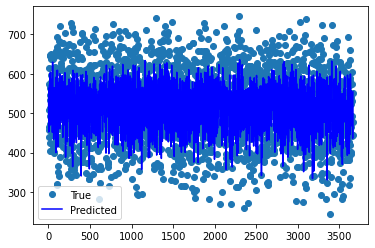

In [38]:
fig, ax = plt.subplots()
ax.plot(rc_dum.index, rc_dum.readingScore, 'o', label="True")
ax.plot(rc_dum.index, predicted_y_training, 'b-', label="Predicted")
plt.legend()

## `5.` Making predictions

In [39]:
r_testc_dum_predict = r_testc_dum[['grade','male','expectBachelors', 'motherBachelors', 'fatherBachelors',
                                  'computerForSchoolwork', 'read30MinsADay', 'publicSchool', 'schoolSize', 'Asian',
                                  'Black','White']]
r_testc_dum_predict['intercept'] = 1

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:>

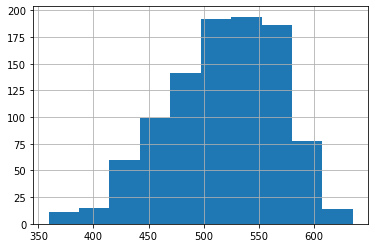

In [40]:
y_prdicted = result3.predict(r_testc_dum_predict)
y_prdicted.hist()